# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [208]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os
import csv

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [170]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [171]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

city_name = []
lat = []
lng = []
temp_max = []
humidity = []
clouds = []
wind = []
country = []
date = []

count = 0
setno = 1
print(f'Beginning Data Retrieval\n',  
        '-----------------------------')
for city in cities:

    response = requests.get(query_url + city).json()

    try:
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])

        print(f"Processing Record {count} of Set {setno} | {city}")
        count += 1
        if count % 50 == 0:
            setno += 1
            count = 0
    # Handle exceptions
    except:
        # Append null values
        print("City not found. Skipping...")

print(f'-----------------------------\nData Retrieval Complete\n-----------------------------\n')


Beginning Data Retrieval
 -----------------------------
Processing Record 0 of Set 1 | tuktoyaktuk
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | forbes
Processing Record 3 of Set 1 | yakovlevka
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | butaritari
City not found. Skipping...
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | russkiy aktash
Processing Record 8 of Set 1 | port lincoln
Processing Record 9 of Set 1 | biak
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | tautira
Processing Record 13 of Set 1 | naze
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | cherskiy
Processing Record 16 of Set 1 | pangai
Processing Record 17 of Set 1 | vasvar
Processing Record 18 of Set 1 | hobart
City not found. Skipping...
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | nyurb

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [172]:
# create dataframe
cities_dict = {
            'City': city_name,
            'Lat': lat,
            'Lng': lng,
            'Max Temp': temp_max,
            'Humidity': humidity,
            'Cloudiness': clouds,
            'Wind Speed': wind,
            'Country': country,
            'Date': date,
}
show_dict = pd.DataFrame(cities_dict)
show_dict.head()

# 'City': city,
# 'Lat': lat,
# 'Lng': lng,
# 'Max Temp': temp_max,
# 'Humidity': humidity,
# 'Cloudiness': clouds,
# 'Wind Speed': wind,
# 'Country': country,
# 'Date': date,

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tuktoyaktuk,69.4541,-133.0374,53.60,71,40,4.61,CA,1628031074
1,Ushuaia,-54.8000,-68.3000,42.46,65,40,6.91,AR,1628031075
2,Forbes,-33.3833,148.0167,44.92,88,67,11.27,AU,1628031075
3,Yakovlevka,44.4250,133.4772,76.21,88,80,3.94,RU,1628031076
4,Port Alfred,-33.5906,26.8910,67.24,32,0,7.20,ZA,1628031076


In [173]:
cs = show_dict[['Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness','Wind Speed', 'Date']]
quartiles = cs.quantile([0.25, 0.5,0.75])
cities_stats = cs.aggregate(['count','mean','std', 'min','max'])
cities_stats = cities_stats.append(quartiles)
cities_stats.index = ['count', 'mean', 'std', 'min', '0.25', '0.5', '0.75', 'max']
cities_stats = cities_stats.rename(index={'0.25': '25%', '0.5': '50%', '0.75': '75%'})
cities_stats

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,5.620000e+02
mean,20.906741,14.281917,68.336762,71.295374,51.391459,7.105552,1.628031e+09
std,34.518971,89.772500,14.937828,21.482778,37.510210,5.012092,1.022816e+02
min,-54.800000,-179.166700,34.410000,8.000000,0.000000,0.000000,1.628031e+09
25%,78.218600,179.316700,118.850000,100.000000,100.000000,34.020000,1.628031e+09
50%,-9.346300,-65.559950,56.922500,58.250000,14.000000,3.360000,1.628031e+09
75%,27.971800,16.941350,69.150000,77.000000,53.500000,5.750000,1.628031e+09
max,49.745900,84.887525,78.930000,88.000000,90.000000,9.302500,1.628031e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [207]:
over_hun = clean_city_data[clean_city_data['Humidity'] > 100]
over_hun


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [175]:
qts = show_dict['Humidity'].quantile([0.25, 0.5,0.75])
# set lower quartile
lowerq = qts[0.25]
# set upper quartile
upperq = qts[0.75]
# calculate interquartile range
iqr = upperq-lowerq
# calculate the lower bound
lower_bound = lowerq - (1.5*iqr)
# calculate the upper bound
upper_bound = upperq + (1.5*iqr)

outliers = show_dict[(show_dict['Humidity'] < lower_bound) | (show_dict['Humidity'] > upper_bound)]
outliers


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
69,Fallon,39.4735,-118.7774,100.45,10,20,0.00,US,1628030969
350,Henderson,36.0397,-114.9819,110.82,11,1,12.66,US,1628031004
398,Buraidah,26.3260,43.9750,86.45,12,12,9.06,SA,1628031211
422,Ridgecrest,35.6225,-117.6709,109.26,8,20,6.91,US,1628031219
515,Jackson,42.4165,-122.8345,98.92,13,8,9.04,US,1628031251
524,Bullhead City,35.1478,-114.5683,118.85,10,40,9.22,US,1628031254


In [190]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = show_dict.drop(
                                labels =[69, 350, 398, 422, 515, 524],
                                inplace=False
)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tuktoyaktuk,69.4541,-133.0374,53.60,71,40,4.61,CA,1628031074
1,Ushuaia,-54.8000,-68.3000,42.46,65,40,6.91,AR,1628031075
2,Forbes,-33.3833,148.0167,44.92,88,67,11.27,AU,1628031075
3,Yakovlevka,44.4250,133.4772,76.21,88,80,3.94,RU,1628031076
4,Port Alfred,-33.5906,26.8910,67.24,32,0,7.20,ZA,1628031076


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

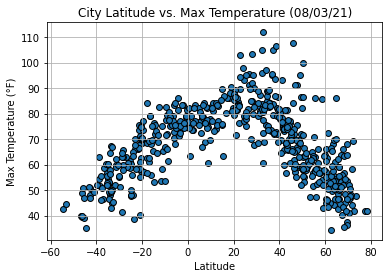

In [191]:
clean_city_data.plot(kind='scatter', x='Lat', y='Max Temp',grid=True, title="City Latitude vs. Max Temperature (08/03/21)",edgecolors='black', s=35)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')
plt.show()

## Latitude vs. Humidity Plot

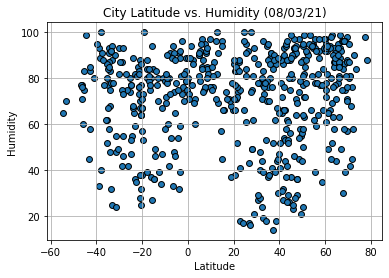

In [192]:
clean_city_data.plot(kind='scatter', x='Lat', y='Humidity',grid=True, title="City Latitude vs. Humidity (08/03/21)",edgecolors='black',s=35)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

## Latitude vs. Cloudiness Plot

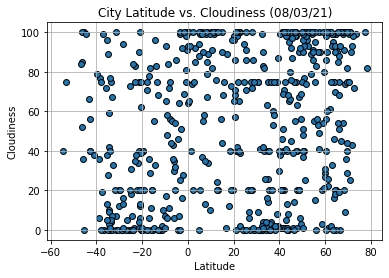

In [193]:
clean_city_data.plot(kind='scatter', x='Lat', y='Cloudiness',grid=True, title="City Latitude vs. Cloudiness (08/03/21)",edgecolors='black',s=35)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

## Latitude vs. Wind Speed Plot

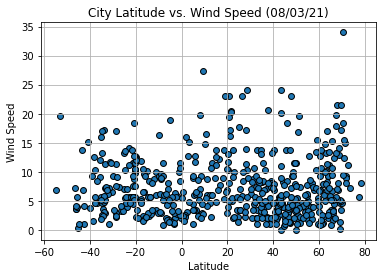

In [195]:
clean_city_data.plot(kind='scatter', x='Lat', y='Wind Speed',grid=True, title="City Latitude vs. Wind Speed (08/03/21)",edgecolors='black',s=35)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

## Linear Regression

In [196]:
nh = clean_city_data[clean_city_data['Lat'] > 0]
sh = clean_city_data[clean_city_data['Lat'] < 0]



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.6846341978973084


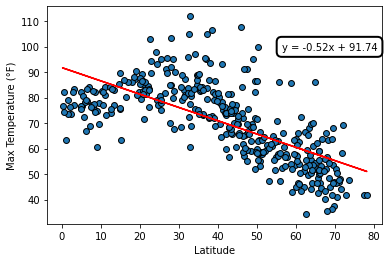

In [197]:
# set x and y values
x_values = nh['Lat']
y_values = nh['Max Temp']
# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# variable for calculation of regression line
regress_values = x_values * slope + intercept
# variable for equation of slope intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
# scatter plot of weight and average tumor volume
plt.scatter(x_values,y_values, edgecolors='black',s=35)
# plot the line of the slope intercept equation
plt.plot(x_values,regress_values,"red")
# style the box for the equation
le_bbox = dict(boxstyle="round,pad=0.5", fc="w", ec="k", lw=2)
# add the equation to the plot
plt.annotate(line_eq,
            xy=(0, 1.5),
            xycoords='axes fraction',
            xytext=(0.7, .8),
            bbox=le_bbox)
# set the title and axis labels
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.807624738021524


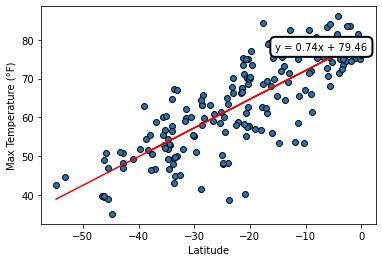

In [198]:
# set x and y values
x_values = sh['Lat']
y_values = sh['Max Temp']
# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# variable for calculation of regression line
regress_values = x_values * slope + intercept
# variable for equation of slope intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
# scatter plot of weight and average tumor volume
plt.scatter(x_values,y_values, edgecolors='black',s=35)
# plot the line of the slope intercept equation
plt.plot(x_values,regress_values,"red")
# style the box for the equation
le_bbox = dict(boxstyle="round,pad=0.5", fc="w", ec="k", lw=2)
# add the equation to the plot
plt.annotate(line_eq,
            xy=(0, 1.5),
            xycoords='axes fraction',
            xytext=(0.7, .8),
            bbox=le_bbox)
# set the title and axis labels
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.043476976496189416


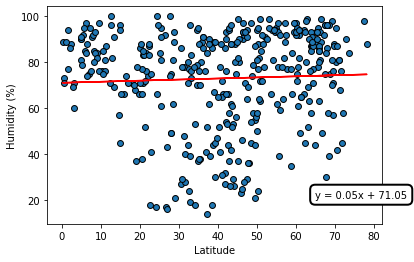

In [199]:
# set x and y values
x_values = nh['Lat']
y_values = nh['Humidity']
# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# variable for calculation of regression line
regress_values = x_values * slope + intercept
# variable for equation of slope intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
# scatter plot of weight and average tumor volume
plt.scatter(x_values,y_values, edgecolors='black',s=35)
# plot the line of the slope intercept equation
plt.plot(x_values,regress_values,"red")
# style the box for the equation
le_bbox = dict(boxstyle="round,pad=0.5", fc="w", ec="k", lw=2)
# add the equation to the plot
plt.annotate(line_eq,
            xy=(0, 1.5),
            xycoords='axes fraction',
            xytext=(0.8, .12),
            bbox=le_bbox)
# set the title and axis labels
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.03780061261594356


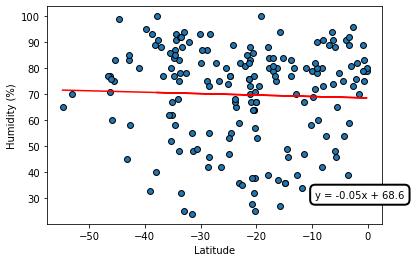

In [200]:
# set x and y values
x_values = sh['Lat']
y_values = sh['Humidity']
# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# variable for calculation of regression line
regress_values = x_values * slope + intercept
# variable for equation of slope intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
# scatter plot of weight and average tumor volume
plt.scatter(x_values,y_values, edgecolors='black',s=35)
# plot the line of the slope intercept equation
plt.plot(x_values,regress_values,"red")
# style the box for the equation
le_bbox = dict(boxstyle="round,pad=0.5", fc="w", ec="k", lw=2)
# add the equation to the plot
plt.annotate(line_eq,
            xy=(0, 1.5),
            xycoords='axes fraction',
            xytext=(0.8, .12),
            bbox=le_bbox)
# set the title and axis labels
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.07266686527638913


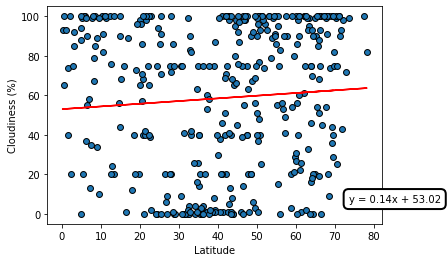

In [201]:
# set x and y values
x_values = nh['Lat']
y_values = nh['Cloudiness']
# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# variable for calculation of regression line
regress_values = x_values * slope + intercept
# variable for equation of slope intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
# scatter plot of weight and average tumor volume
plt.scatter(x_values,y_values, edgecolors='black',s=35)
# plot the line of the slope intercept equation
plt.plot(x_values,regress_values,"red")
# style the box for the equation
le_bbox = dict(boxstyle="round,pad=0.5", fc="w", ec="k", lw=2)
# add the equation to the plot
plt.annotate(line_eq,
            xy=(0, 1.5),
            xycoords='axes fraction',
            xytext=(0.9, .1),
            bbox=le_bbox)
# set the title and axis labels
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.07604314323910806


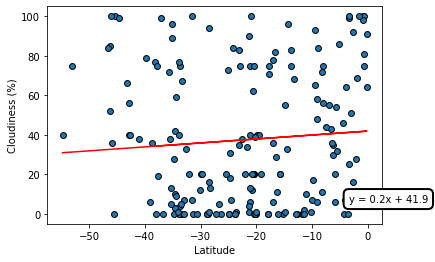

In [202]:
# set x and y values
x_values = sh['Lat']
y_values = sh['Cloudiness']
# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# variable for calculation of regression line
regress_values = x_values * slope + intercept
# variable for equation of slope intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
# scatter plot of weight and average tumor volume
plt.scatter(x_values,y_values, edgecolors='black',s=35)
# plot the line of the slope intercept equation
plt.plot(x_values,regress_values,"red")
# style the box for the equation
le_bbox = dict(boxstyle="round,pad=0.5", fc="w", ec="k", lw=2)
# add the equation to the plot
plt.annotate(line_eq,
            xy=(0, 1.5),
            xycoords='axes fraction',
            xytext=(0.9, .1),
            bbox=le_bbox)
# set the title and axis labels
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.02458039209686928


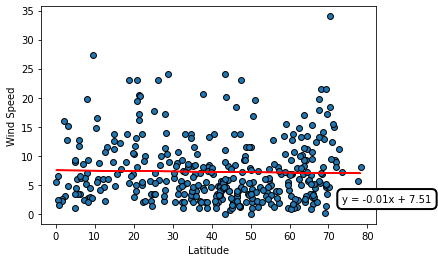

In [203]:
# set x and y values
x_values = nh['Lat']
y_values = nh['Wind Speed']
# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# variable for calculation of regression line
regress_values = x_values * slope + intercept
# variable for equation of slope intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
# scatter plot of weight and average tumor volume
plt.scatter(x_values,y_values, edgecolors='black',s=35)
# plot the line of the slope intercept equation
plt.plot(x_values,regress_values,"red")
# style the box for the equation
le_bbox = dict(boxstyle="round,pad=0.5", fc="w", ec="k", lw=2)
# add the equation to the plot
plt.annotate(line_eq,
            xy=(0, 1.5),
            xycoords='axes fraction',
            xytext=(0.9, .1),
            bbox=le_bbox)
# set the title and axis labels
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.1269043349842945


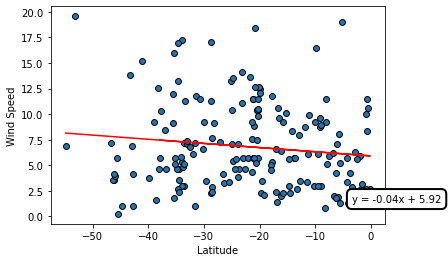

In [204]:
# set x and y values
x_values = sh['Lat']
y_values = sh['Wind Speed']
# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# variable for calculation of regression line
regress_values = x_values * slope + intercept
# variable for equation of slope intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
# scatter plot of weight and average tumor volume
plt.scatter(x_values,y_values, edgecolors='black',s=35)
# plot the line of the slope intercept equation
plt.plot(x_values,regress_values,"red")
# style the box for the equation
le_bbox = dict(boxstyle="round,pad=0.5", fc="w", ec="k", lw=2)
# add the equation to the plot
plt.annotate(line_eq,
            xy=(0, 1.5),
            xycoords='axes fraction',
            xytext=(0.9, .1),
            bbox=le_bbox)
# set the title and axis labels
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()